<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkPY0220ENSkillsNetwork900-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo">
    </a>
</p>


<h1>Extracting and Visualizing Stock Data</h1>
<h2>Description</h2>


Extracting essential data from a dataset and displaying it is a necessary part of data science; therefore individuals can make correct decisions based on the data. In this assignment, you will extract some stock data, you will then display this data in a graph.


<h2>Table of Contents</h2>
<div class="alert alert-block alert-info" style="margin-top: 20px">
    <ul>
        <li>Define a Function that Makes a Graph</li>
        <li>Question 1: Use yfinance to Extract Stock Data</li>
        <li>Question 2: Use Webscraping to Extract Tesla Revenue Data</li>
        <li>Question 3: Use yfinance to Extract Stock Data</li>
        <li>Question 4: Use Webscraping to Extract GME Revenue Data</li>
        <li>Question 5: Plot Tesla Stock Graph</li>
        <li>Question 6: Plot GameStop Stock Graph</li>
    </ul>
<p>
    Estimated Time Needed: <strong>30 min</strong></p>
</div>

<hr>


***Note***:- If you are working Locally using anaconda, please uncomment the following code and execute it.


In [ ]:
#!pip install yfinance==0.2.38
#!pip install pandas==2.2.2
#!pip install nbformat

In [ ]:
!pip install yfinance==0.1.67
!mamba install bs4==4.10.0 -y
!pip install nbformat==4.2.0

In [ ]:
import yfinance as yf
import pandas as pd
import requests
from bs4 import BeautifulSoup
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In Python, you can ignore warnings using the warnings module. You can use the filterwarnings function to filter or ignore specific warning messages or categories.


In [ ]:
import warnings
# Ignore all warnings
warnings.filterwarnings("ignore", category=FutureWarning)

## Define Graphing Function


In this section, we define the function `make_graph`. You don't have to know how the function works, you should only care about the inputs. It takes a dataframe with stock data (dataframe must contain Date and Close columns), a dataframe with revenue data (dataframe must contain Date and Revenue columns), and the name of the stock.


In [ ]:
def make_graph(stock_data, revenue_data, stock):
    fig = make_subplots(rows=2, cols=1, shared_xaxes=True, subplot_titles=("Historical Share Price", "Historical Revenue"), vertical_spacing = .3)
    stock_data_specific = stock_data[stock_data.Date <= '2021--06-14']
    revenue_data_specific = revenue_data[revenue_data.Date <= '2021-04-30']
    fig.add_trace(go.Scatter(x=pd.to_datetime(stock_data_specific.Date, infer_datetime_format=True), y=stock_data_specific.Close.astype("float"), name="Share Price"), row=1, col=1)
    fig.add_trace(go.Scatter(x=pd.to_datetime(revenue_data_specific.Date, infer_datetime_format=True), y=revenue_data_specific.Revenue.astype("float"), name="Revenue"), row=2, col=1)
    fig.update_xaxes(title_text="Date", row=1, col=1)
    fig.update_xaxes(title_text="Date", row=2, col=1)
    fig.update_yaxes(title_text="Price ($US)", row=1, col=1)
    fig.update_yaxes(title_text="Revenue ($US Millions)", row=2, col=1)
    fig.update_layout(showlegend=False,
    height=900,
    title=stock,
    xaxis_rangeslider_visible=True)
    fig.show()

## Question 1: Use yfinance to Extract Stock Data


Using the `Ticker` function enter the ticker symbol of the stock we want to extract data on to create a ticker object. The stock is Tesla and its ticker symbol is `TSLA`.


In [96]:
import yfinance as yf

tesla_ticker = yf.Ticker("TSLA")

Using the ticker object and the function `history` extract stock information and save it in a dataframe named `tesla_data`. Set the `period` parameter to `max` so we get information for the maximum amount of time.


In [ ]:
tesla_data=tesla_ticker.history(period="max")
print(tesla_data.head)

**Reset the index** using the `reset_index(inplace=True)` function on the tesla_data DataFrame and display the first five rows of the `tesla_data` dataframe using the `head` function. Take a screenshot of the results and code from the beginning of Question 1 to the results below.


In [97]:

tesla_data.reset_index(inplace=True)

print(tesla_data.head(6))

   index       Date      Open      High       Low     Close     Volume  \
0      0 2010-06-29  1.266667  1.666667  1.169333  1.592667  281494500   
1      1 2010-06-30  1.719333  2.028000  1.553333  1.588667  257806500   
2      2 2010-07-01  1.666667  1.728000  1.351333  1.464000  123282000   
3      3 2010-07-02  1.533333  1.540000  1.247333  1.280000   77097000   
4      4 2010-07-06  1.333333  1.333333  1.055333  1.074000  103003500   
5      5 2010-07-07  1.093333  1.108667  0.998667  1.053333  103825500   

   Dividends  Stock Splits  
0          0           0.0  
1          0           0.0  
2          0           0.0  
3          0           0.0  
4          0           0.0  
5          0           0.0  


## Question 2: Use Webscraping to Extract Tesla Revenue Data


Use the `requests` library to download the webpage https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm Save the text of the response as a variable named `html_data`.


In [ ]:
!pip install beautifulsoup4
import requests
from bs4 import BeautifulSoup

url= "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm"

Parse the html data using `beautiful_soup`.


In [ ]:
# Realizar la solicitud GET a la URL
response = requests.get(url)

# Guardar el texto de la respuesta en la variable html_data
html_data = response.text

# Analizar los datos HTML utilizando BeautifulSoup
soup = BeautifulSoup(html_data, 'html.parser')

# Opcional: imprimir el título de la página para verificar
print(soup.title)

Using `BeautifulSoup` or the `read_html` function extract the table with `Tesla Revenue` and store it into a dataframe named `tesla_revenue`. The dataframe should have columns `Date` and `Revenue`.


<details><summary>Click here if you need help locating the table</summary>

```
    
Below is the code to isolate the table, you will now need to loop through the rows and columns like in the previous lab
    
soup.find_all("tbody")[1]
    
If you want to use the read_html function the table is located at index 1

We are focusing on quarterly revenue in the lab.
```

</details>


In [ ]:
# Encontrar la tabla de ingresos de Tesla
tables = soup.find_all('table')

# Asumiendo que la tabla correcta es la primera
tesla_revenue_table = tables[0]

# Leer la tabla en un DataFrame
tesla_revenue = pd.read_html(str(tesla_revenue_table))[0]

# Renombrar las columnas a 'Date' y 'Revenue'
tesla_revenue.columns = ['Date', 'Revenue']

# Limpiar los datos (opcional)
tesla_revenue['Revenue'] = tesla_revenue['Revenue'].str.replace(',', '').str.replace('$', '')

# Convertir Revenue a numérico
tesla_revenue['Revenue'] = pd.to_numeric(tesla_revenue['Revenue'], errors='coerce')

# Mostrar las primeras filas del DataFrame para verificar
print(tesla_revenue.head())

Execute the following line to remove the comma and dollar sign from the `Revenue` column. 


In [ ]:
tesla_revenue["Revenue"] = tesla_revenue['Revenue'].str.replace(',|\$',"")

Execute the following lines to remove an null or empty strings in the Revenue column.


In [ ]:
tesla_revenue.dropna(inplace=True)

tesla_revenue = tesla_revenue[tesla_revenue['Revenue'] != ""]

Display the last 5 row of the `tesla_revenue` dataframe using the `tail` function. Take a screenshot of the results.


In [ ]:
print(tesla_revenue.tail())

## Question 3: Use yfinance to Extract Stock Data


Using the `Ticker` function enter the ticker symbol of the stock we want to extract data on to create a ticker object. The stock is GameStop and its ticker symbol is `GME`.


In [ ]:
import yfinance as yf

# Crear un objeto de ticker para GameStop
gme_ticker = yf.Ticker("GME")

Using the ticker object and the function `history` extract stock information and save it in a dataframe named `gme_data`. Set the `period` parameter to `max` so we get information for the maximum amount of time.


In [89]:
gme_data=gme_ticker.history("max")
print(gme_data.head)

<bound method NDFrame.head of                  Open       High        Low      Close     Volume  Dividends  \
Date                                                                           
2002-02-13   1.620128   1.693349   1.603295   1.691666   76216000        0.0   
2002-02-14   1.712707   1.716074   1.670626   1.683250   11021600        0.0   
2002-02-15   1.683250   1.687458   1.658002   1.674834    8389600        0.0   
2002-02-19   1.666418   1.666418   1.578047   1.607504    7410400        0.0   
2002-02-20   1.615920   1.662209   1.603295   1.662209    6892800        0.0   
...               ...        ...        ...        ...        ...        ...   
2024-05-13  26.340000  38.200001  24.770000  30.450001  187241700        0.0   
2024-05-14  64.830002  64.830002  36.000000  48.750000  206979100        0.0   
2024-05-15  40.310001  42.349998  31.000000  39.549999  131790100        0.0   
2024-05-16  33.980000  35.240002  27.590000  27.670000   76177600        0.0   
2024-05-17

**Reset the index** using the `reset_index(inplace=True)` function on the gme_data DataFrame and display the first five rows of the `gme_data` dataframe using the `head` function. Take a screenshot of the results and code from the beginning of Question 3 to the results below.


In [90]:
gme_data.reset_index(inplace=True)

print(gme_data.head(6))

        Date      Open      High       Low     Close    Volume  Dividends  \
0 2002-02-13  1.620128  1.693349  1.603295  1.691666  76216000        0.0   
1 2002-02-14  1.712707  1.716074  1.670626  1.683250  11021600        0.0   
2 2002-02-15  1.683250  1.687458  1.658002  1.674834   8389600        0.0   
3 2002-02-19  1.666418  1.666418  1.578047  1.607504   7410400        0.0   
4 2002-02-20  1.615920  1.662209  1.603295  1.662209   6892800        0.0   
5 2002-02-21  1.656318  1.670626  1.641169  1.658002   6976800        0.0   

   Stock Splits  
0           0.0  
1           0.0  
2           0.0  
3           0.0  
4           0.0  
5           0.0  


## Question 4: Use Webscraping to Extract GME Revenue Data


Use the `requests` library to download the webpage https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html. Save the text of the response as a variable named `html_data`.


In [85]:
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html"
html_data= requests.get(url).text

Parse the html data using `beautiful_soup`.


In [88]:
!pip install html5lib

soup = BeautifulSoup(html_data, "html5lib")

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.2/112.2 kB 18.8 MB/s eta 0:00:00


FeatureNotFound: Couldn't find a tree builder with the features you requested: html5lib. Do you need to install a parser library?

Using `BeautifulSoup` or the `read_html` function extract the table with `GameStop Revenue` and store it into a dataframe named `gme_revenue`. The dataframe should have columns `Date` and `Revenue`. Make sure the comma and dollar sign is removed from the `Revenue` column using a method similar to what you did in Question 2.


<details><summary>Click here if you need help locating the table</summary>

```
    
Below is the code to isolate the table, you will now need to loop through the rows and columns like in the previous lab
    
soup.find_all("tbody")[1]
    
If you want to use the read_html function the table is located at index 1


```

</details>


In [94]:
gme_revenue = pd.read_html(html_data, match="GameeStop Quarterly Revenue")[0]
gme_revenue.rename(inplace-True, columns={"GameStop Quarterly Revenue(Millions of.US.$)": "Date", "GameStop.Quarterly Revenue(Millions of US $).1": "Revenue"})
gme_revenue["Revenue"] = gme_revenue["Revenue" ]. str.replace(', |+$',"",regex-True)
gme_revenue.dropna(inplace-True)
gme_revenue = gme_revenue[gme_revenue["Revenue"] !=""]

SyntaxError: EOL while scanning string literal (4114259229.py, line 3)

Display the last five rows of the `gme_revenue` dataframe using the `tail` function. Take a screenshot of the results.


In [ ]:
gme_revenue.tail()

## Question 5: Plot Tesla Stock Graph


Use the `make_graph` function to graph the Tesla Stock Data, also provide a title for the graph. The structure to call the `make_graph` function is `make_graph(tesla_data, tesla_revenue, 'Tesla')`. Note the graph will only show data upto June 2021.


        Date      Open      High       Low     Close     Volume  Dividends  \
0 2010-06-29  1.266667  1.666667  1.169333  1.592667  281494500          0   
1 2010-06-30  1.719333  2.028000  1.553333  1.588667  257806500          0   
2 2010-07-01  1.666667  1.728000  1.351333  1.464000  123282000          0   
3 2010-07-02  1.533333  1.540000  1.247333  1.280000   77097000          0   
4 2010-07-06  1.333333  1.333333  1.055333  1.074000  103003500          0   

   Stock Splits  
0           0.0  
1           0.0  
2           0.0  
3           0.0  
4           0.0  
   Date  Revenue
0  2021    53823
1  2020    31536
2  2019    24578
3  2018    21461
4  2017    11759


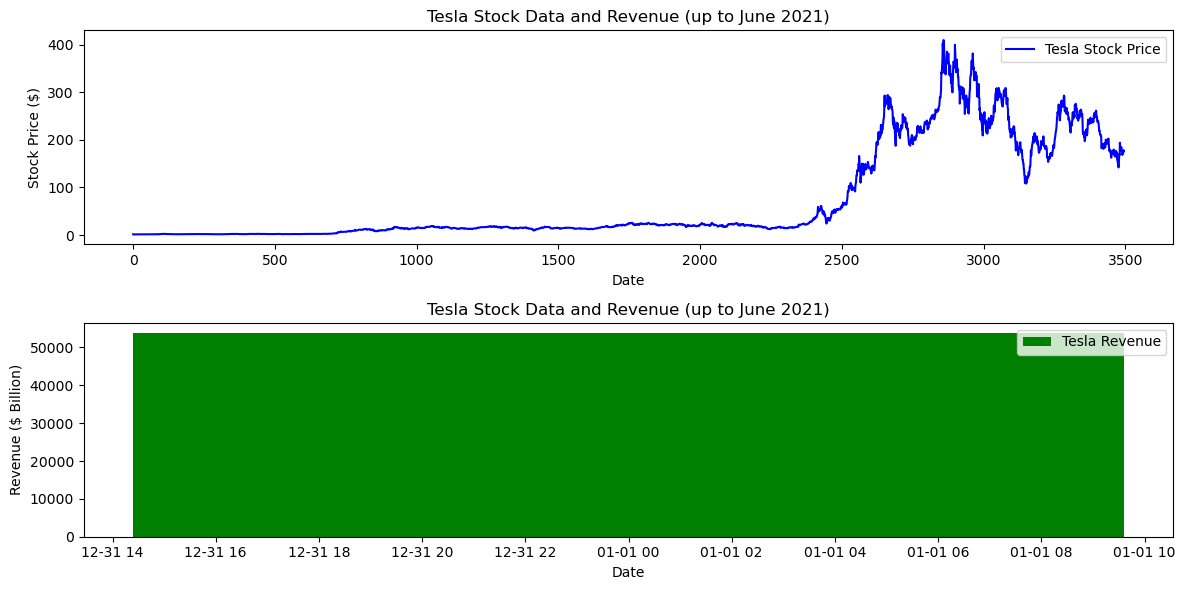

In [93]:
import yfinance as yf
import pandas as pd
import requests
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt

def make_graph(stock_data, revenue_data, stock_name, title):
    plt.figure(figsize=(12, 6))
    
    # Graficar los datos de las acciones
    plt.subplot(2, 1, 1)
    plt.plot(stock_data.index, stock_data['Close'], label=f'{stock_name} Stock Price', color='b')
    plt.xlabel('Date')
    plt.ylabel('Stock Price ($)')
    plt.title(f'{title}')
    plt.legend()
    
    # Graficar los datos de ingresos
    plt.subplot(2, 1, 2)
    plt.bar(revenue_data['Date'], revenue_data['Revenue'], label=f'{stock_name} Revenue', color='g')
    plt.xlabel('Date')
    plt.ylabel('Revenue ($ Billion)')
    plt.title(f'{title}')
    plt.legend()
    
    # Ajustar el diseño de la figura
    plt.tight_layout()
    
    # Mostrar el gráfico
    plt.show()

# Obtener los datos históricos de Tesla
tesla_ticker = yf.Ticker("TSLA")
tesla_data = tesla_ticker.history(period="max")

# Resetear el índice para tener la fecha como una columna
tesla_data.reset_index(inplace=True)

# Mostrar las primeras filas para verificar
print(tesla_data.head())

# URL de la página web con los datos de ingresos de Tesla
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm"

# Realizar la solicitud GET a la URL
response = requests.get(url)

# Guardar el texto de la respuesta en la variable html_data
html_data = response.text

# Analizar los datos HTML utilizando BeautifulSoup con html5lib
soup = BeautifulSoup(html_data, "html.parser")

# Encontrar la tabla de ingresos de Tesla
tables = soup.find_all('table')

# Asumiendo que la tabla correcta es la primera
tesla_revenue_table = tables[0]

# Leer la tabla en un DataFrame
tesla_revenue = pd.read_html(str(tesla_revenue_table))[0]

# Renombrar las columnas a 'Date' y 'Revenue'
tesla_revenue.columns = ['Date', 'Revenue']

# Limpiar los datos
tesla_revenue['Revenue'] = tesla_revenue['Revenue'].str.replace(',', '').str.replace('$', '')

# Convertir Revenue a numérico
tesla_revenue['Revenue'] = pd.to_numeric(tesla_revenue['Revenue'], errors='coerce')

# Mostrar las primeras filas del DataFrame para verificar
print(tesla_revenue.head())

# Eliminar filas con NaN y valores vacíos en Revenue
tesla_revenue.dropna(inplace=True)
tesla_revenue = tesla_revenue[tesla_revenue['Revenue'] != ""]

# Convertir la columna 'Date' a tipo datetime
tesla_revenue['Date'] = pd.to_datetime(tesla_revenue['Date'])

# Filtrar los datos de ingresos hasta junio de 2021
tesla_revenue = tesla_revenue[tesla_revenue['Date'] <= '2021-06-30']

# Título para el gráfico
graph_title = 'Tesla Stock Data and Revenue (up to June 2021)'

# Graficar los datos de Tesla
make_graph(tesla_data, tesla_revenue, 'Tesla', graph_title)


        Date      Open      High       Low     Close     Volume  Dividends  \
0 2010-06-29  1.266667  1.666667  1.169333  1.592667  281494500          0   
1 2010-06-30  1.719333  2.028000  1.553333  1.588667  257806500          0   
2 2010-07-01  1.666667  1.728000  1.351333  1.464000  123282000          0   
3 2010-07-02  1.533333  1.540000  1.247333  1.280000   77097000          0   
4 2010-07-06  1.333333  1.333333  1.055333  1.074000  103003500          0   

   Stock Splits  
0           0.0  
1           0.0  
2           0.0  
3           0.0  
4           0.0  
   Date  Revenue
0  2021    53823
1  2020    31536
2  2019    24578
3  2018    21461
4  2017    11759


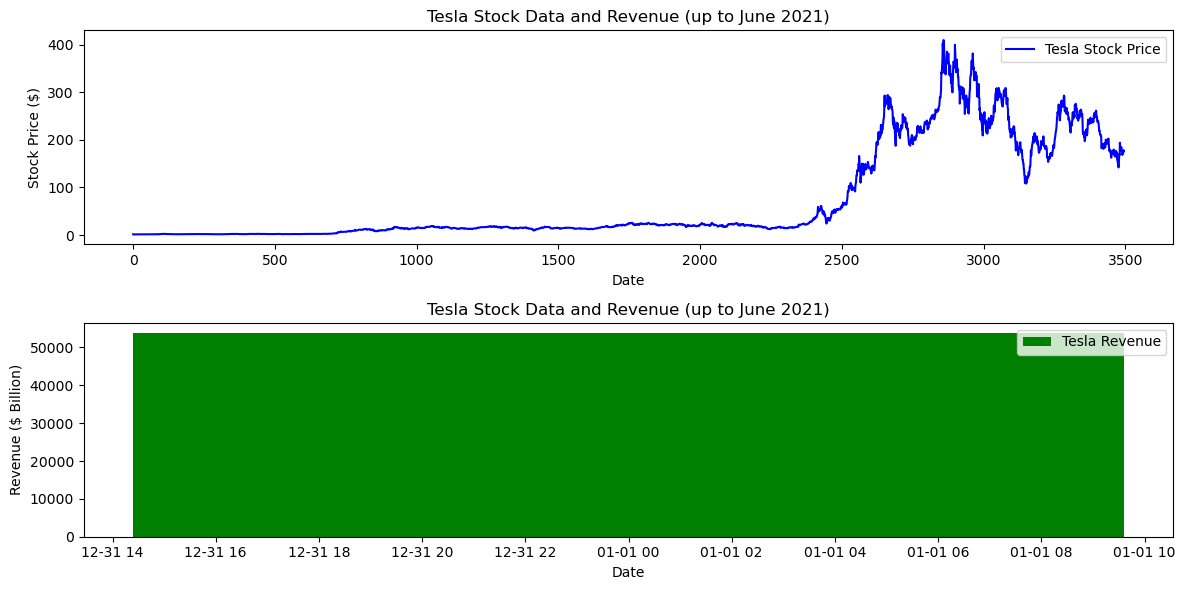

In [93]:
import yfinance as yf
import pandas as pd
import requests
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt

def make_graph(stock_data, revenue_data, stock_name, title):
    plt.figure(figsize=(12, 6))
    
    # Graficar los datos de las acciones
    plt.subplot(2, 1, 1)
    plt.plot(stock_data.index, stock_data['Close'], label=f'{stock_name} Stock Price', color='b')
    plt.xlabel('Date')
    plt.ylabel('Stock Price ($)')
    plt.title(f'{title}')
    plt.legend()
    
    # Graficar los datos de ingresos
    plt.subplot(2, 1, 2)
    plt.bar(revenue_data['Date'], revenue_data['Revenue'], label=f'{stock_name} Revenue', color='g')
    plt.xlabel('Date')
    plt.ylabel('Revenue ($ Billion)')
    plt.title(f'{title}')
    plt.legend()
    
    # Ajustar el diseño de la figura
    plt.tight_layout()
    
    # Mostrar el gráfico
    plt.show()

# Obtener los datos históricos de Tesla
tesla_ticker = yf.Ticker("TSLA")
tesla_data = tesla_ticker.history(period="max")

# Resetear el índice para tener la fecha como una columna
tesla_data.reset_index(inplace=True)

# Mostrar las primeras filas para verificar
print(tesla_data.head())

# URL de la página web con los datos de ingresos de Tesla
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm"

# Realizar la solicitud GET a la URL
response = requests.get(url)

# Guardar el texto de la respuesta en la variable html_data
html_data = response.text

# Analizar los datos HTML utilizando BeautifulSoup con html5lib
soup = BeautifulSoup(html_data, "html.parser")

# Encontrar la tabla de ingresos de Tesla
tables = soup.find_all('table')

# Asumiendo que la tabla correcta es la primera
tesla_revenue_table = tables[0]

# Leer la tabla en un DataFrame
tesla_revenue = pd.read_html(str(tesla_revenue_table))[0]

# Renombrar las columnas a 'Date' y 'Revenue'
tesla_revenue.columns = ['Date', 'Revenue']

# Limpiar los datos
tesla_revenue['Revenue'] = tesla_revenue['Revenue'].str.replace(',', '').str.replace('$', '')

# Convertir Revenue a numérico
tesla_revenue['Revenue'] = pd.to_numeric(tesla_revenue['Revenue'], errors='coerce')

# Mostrar las primeras filas del DataFrame para verificar
print(tesla_revenue.head())

# Eliminar filas con NaN y valores vacíos en Revenue
tesla_revenue.dropna(inplace=True)
tesla_revenue = tesla_revenue[tesla_revenue['Revenue'] != ""]

# Convertir la columna 'Date' a tipo datetime
tesla_revenue['Date'] = pd.to_datetime(tesla_revenue['Date'])

# Filtrar los datos de ingresos hasta junio de 2021
tesla_revenue = tesla_revenue[tesla_revenue['Date'] <= '2021-06-30']

# Título para el gráfico
graph_title = 'Tesla Stock Data and Revenue (up to June 2021)'

# Graficar los datos de Tesla
make_graph(tesla_data, tesla_revenue, 'Tesla', graph_title)


## Question 6: Plot GameStop Stock Graph


Use the `make_graph` function to graph the GameStop Stock Data, also provide a title for the graph. The structure to call the `make_graph` function is `make_graph(gme_data, gme_revenue, 'GameStop')`. Note the graph will only show data upto June 2021.


        Date      Open      High       Low     Close    Volume  Dividends  \
0 2002-02-13  1.620128  1.693349  1.603295  1.691666  76216000        0.0   
1 2002-02-14  1.712707  1.716074  1.670626  1.683250  11021600        0.0   
2 2002-02-15  1.683251  1.687459  1.658002  1.674834   8389600        0.0   
3 2002-02-19  1.666418  1.666418  1.578047  1.607504   7410400        0.0   
4 2002-02-20  1.615920  1.662210  1.603296  1.662210   6892800        0.0   

   Stock Splits  
0           0.0  
1           0.0  
2           0.0  
3           0.0  
4           0.0  
   Date  Revenue
0  2021    53823
1  2020    31536
2  2019    24578
3  2018    21461
4  2017    11759


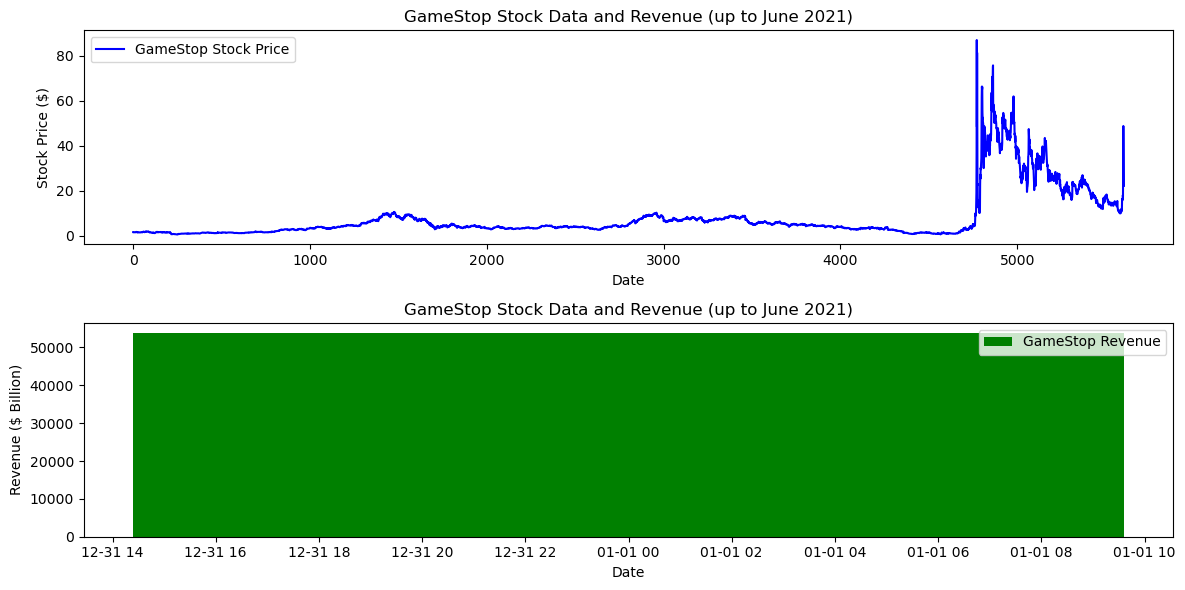

In [95]:
import yfinance as yf
import pandas as pd
import requests
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt

def make_graph(stock_data, revenue_data, stock_name, title):
    plt.figure(figsize=(12, 6))
    
    # Graficar los datos de las acciones
    plt.subplot(2, 1, 1)
    plt.plot(stock_data.index, stock_data['Close'], label=f'{stock_name} Stock Price', color='b')
    plt.xlabel('Date')
    plt.ylabel('Stock Price ($)')
    plt.title(f'{title}')
    plt.legend()
    
    # Graficar los datos de ingresos
    plt.subplot(2, 1, 2)
    plt.bar(revenue_data['Date'], revenue_data['Revenue'], label=f'{stock_name} Revenue', color='g')
    plt.xlabel('Date')
    plt.ylabel('Revenue ($ Billion)')
    plt.title(f'{title}')
    plt.legend()
    
    # Ajustar el diseño de la figura
    plt.tight_layout()
    
    # Mostrar el gráfico
    plt.show()

# Obtener los datos históricos de GameStop
gme_ticker = yf.Ticker("GME")
gme_data = gme_ticker.history(period="max")

# Resetear el índice para tener la fecha como una columna
gme_data.reset_index(inplace=True)

# Mostrar las primeras filas para verificar
print(gme_data.head())

# URL de la página web con los datos de ingresos de GameStop
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm"

# Realizar la solicitud GET a la URL
response = requests.get(url)

# Guardar el texto de la respuesta en la variable html_data
html_data = response.text

# Analizar los datos HTML utilizando BeautifulSoup con html.parser
soup = BeautifulSoup(html_data, "html.parser")

# Encontrar la tabla de ingresos de GameStop
tables = soup.find_all('table')

# Asumiendo que la tabla correcta es la primera
gme_revenue_table = tables[0]

# Leer la tabla en un DataFrame
gme_revenue = pd.read_html(str(gme_revenue_table))[0]

# Renombrar las columnas a 'Date' y 'Revenue'
gme_revenue.columns = ['Date', 'Revenue']

# Limpiar los datos
gme_revenue['Revenue'] = gme_revenue['Revenue'].str.replace(',', '').str.replace('$', '')

# Convertir Revenue a numérico
gme_revenue['Revenue'] = pd.to_numeric(gme_revenue['Revenue'], errors='coerce')

# Mostrar las primeras filas del DataFrame para verificar
print(gme_revenue.head())

# Eliminar filas con NaN y valores vacíos en Revenue
gme_revenue.dropna(inplace=True)
gme_revenue = gme_revenue[gme_revenue['Revenue'] != ""]

# Convertir la columna 'Date' a tipo datetime
gme_revenue['Date'] = pd.to_datetime(gme_revenue['Date'])

# Filtrar los datos de ingresos hasta junio de 2021
gme_revenue = gme_revenue[gme_revenue['Date'] <= '2021-06-30']

# Título para el gráfico
graph_title = 'GameStop Stock Data and Revenue (up to June 2021)'

# Graficar los datos de GameStop
make_graph(gme_data, gme_revenue, 'GameStop', graph_title)

<h2>About the Authors:</h2> 

<a href="https://www.linkedin.com/in/joseph-s-50398b136/">Joseph Santarcangelo</a> has a PhD in Electrical Engineering, his research focused on using machine learning, signal processing, and computer vision to determine how videos impact human cognition. Joseph has been working for IBM since he completed his PhD.

Azim Hirjani


## Change Log

| Date (YYYY-MM-DD) | Version | Changed By    | Change Description        |
| ----------------- | ------- | ------------- | ------------------------- |
| 2022-02-28        | 1.2     | Lakshmi Holla | Changed the URL of GameStop |
| 2020-11-10        | 1.1     | Malika Singla | Deleted the Optional part |
| 2020-08-27        | 1.0     | Malika Singla | Added lab to GitLab       |

<hr>

## <h3 align="center"> © IBM Corporation 2020. All rights reserved. <h3/>

<p>
